<h1><center> EJERCICIO 4, PRIMERA TAREA. </center></h1>

Para cada uno de los siguientes conjuntos de datos, ajustar un modelo de regresión sobre alguna función $f(x)$ que pase por las nubes de puntos. No olvide que debe realizar el análisis de significancia de los coeficientes, ANOVA, etc. sobre los modelos ajustados. Por último, general la gráfica de la función $f(x)$ estimada y el scatter plot como se muestra a continuación de modo que se aprecie la tendencia que siguen los puntos sobre la función estimada.

### Descargar librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

plt.rcParams["figure.figsize"] = (20,15)
plt.style.use('seaborn-poster')

__NOTA__: Recordar que la R^2 es invariante ante transformaciones. Por lo tanto, los datos reportados por StatsModels para modelos lineales son consistentes aún cuando hayan sufrido transformaciones.

<h1><center>Dataset 1</center></h1>

Desde antes de comenzar el análisis, puedo apreciar que esta forma es muy típica de un ajuste polinómico de tercer grado.

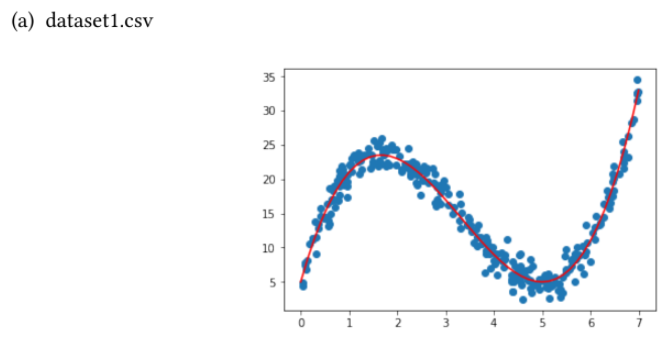

### Importar información

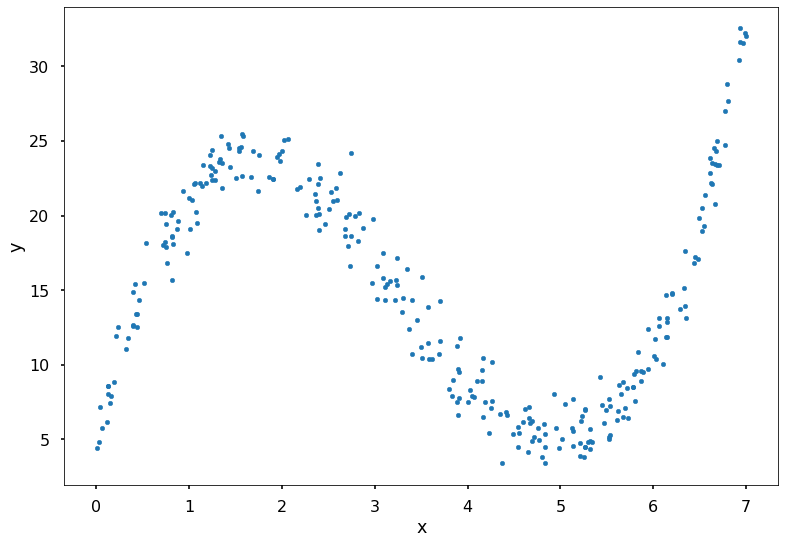

In [7]:
df1 = pd.read_csv("dataset1.csv")
df1.plot.scatter(x = "x", y = "y")

### Análisis de regresión

Como primer paso, ajustaré un modelo lineal clásico, haciendo caso omiso de mi instito por identificar un modelo de tercer grado. 

In [8]:
df1

,x,y
0,1.982099,23.640317
1,5.888505,9.505626
2,6.434295,16.831942
3,2.677603,18.645546
4,0.038735,7.154553
...,...,...
295,5.295838,4.825265
296,2.191009,21.913409
297,6.624410,22.170171
298,2.522396,21.592905


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     18.29
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.56e-05
Time:                        02:11:49   Log-Likelihood:                -1011.0
No. Observations:                 300   AIC:                             2026.
Df Residuals:                     298   BIC:                             2033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7717      0.813     21.858      0.000      16.172      19.372
x             -0.8382      0.196     -4.277      0.000      -1.224      -0.452
==============================================================================
Omnibus:                       11.308   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.613
Skew:                           0.455   Prob(JB):                      0.00301
Kurtosis:                       2.680   Cond. No.                         8.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

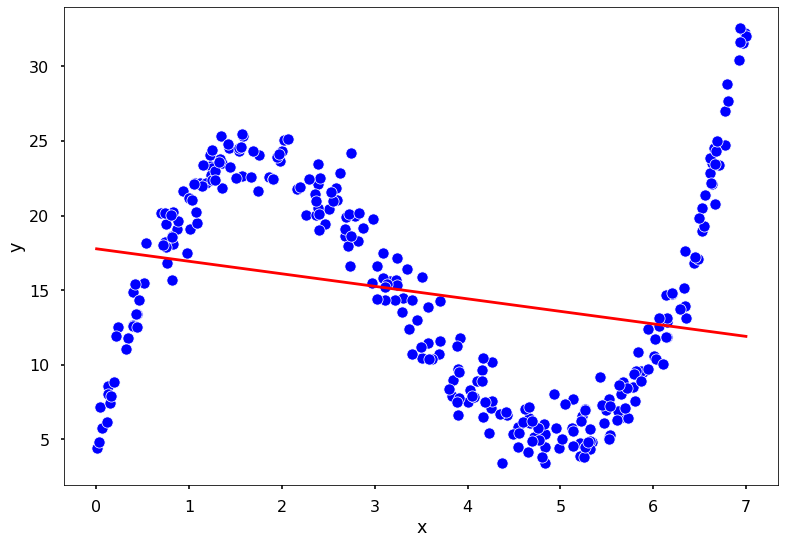

In [13]:
Yreg = df1["y"]
Xreg = sm.add_constant(df1["x"])
model = sm.OLS(Yreg,Xreg).fit()
display(model.summary())

beta = list(model.params)
X = np.linspace(min(df1['x']),max(df1['x']))
Y = beta[0]+beta[1]*X

sns.scatterplot(data=df1, x="x", y="y",color='Blue')
plt.plot(X, Y, c='red')

Como desde el principio identifiqué que este podría tratarse de un ajuste polinómico de grado tres, procederé a calcular estás 2 nuevas columnas para agregarlas al modelo.

In [16]:
df1["x2"] = df1["x"]**2
df1["x3"] = df1["x"]**3
df1.head(3)

,x,y,x2,x3
0,1.982099,23.640317,3.928718,7.787109
1,5.888505,9.505626,34.674490,204.180903
2,6.434295,16.831942,41.400153,266.380803


Procederé a volver a ajustar un modelo pero ahora incluyendo las nuevas variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2683.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):          3.20e-214
Time:                        02:22:41   Log-Likelihood:                -519.07
No. Observations:                 300   AIC:                             1046.
Df Residuals:                     296   BIC:                             1061.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9434      0.312     15.847      0.000       4.329       5.557
x             25.2344      0.392     64.432      0.000      24.464      26.005
x2           -10.0807      0.129    -77.886      0.000     -10.335      -9.826
x3             1.0066      0.012     83.266      0.000       0.983       1.030
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                1.132
Skew:                           0.121   Prob(JB):                        0.568
Kurtosis:                       3.180   Cond. No.                         868.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

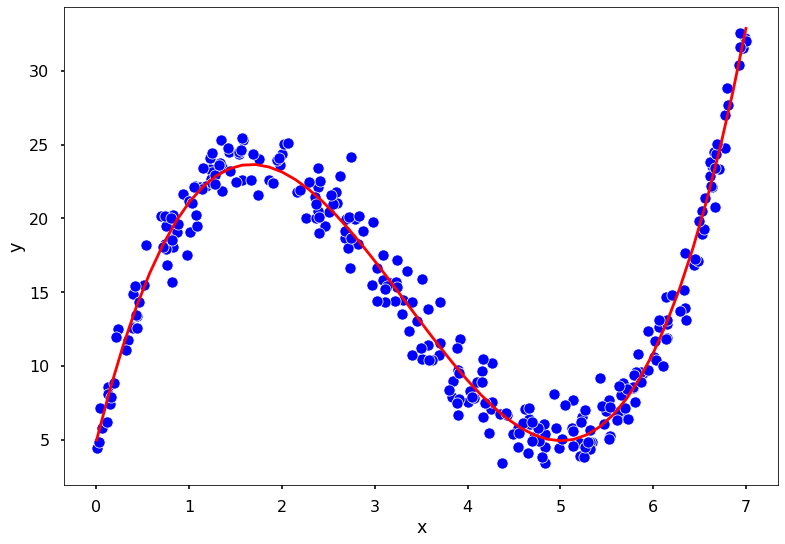

In [19]:
Yreg = df1["y"]
Xreg = sm.add_constant(df1[["x","x2","x3"]])
model = sm.OLS(Yreg,Xreg).fit()
display(model.summary())

beta = list(model.params)
X = np.linspace(min(df1['x']),max(df1['x']))
Y = beta[0]+beta[1]*X + beta[2]*X**2+beta[3]*X**3

sns.scatterplot(data=df1, x="x", y="y",color='Blue')
plt.plot(X, Y, c='red')

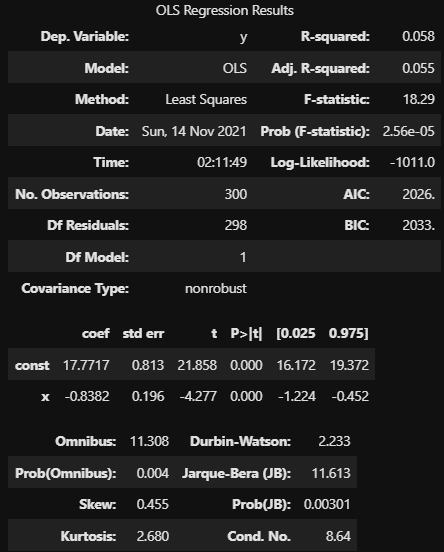
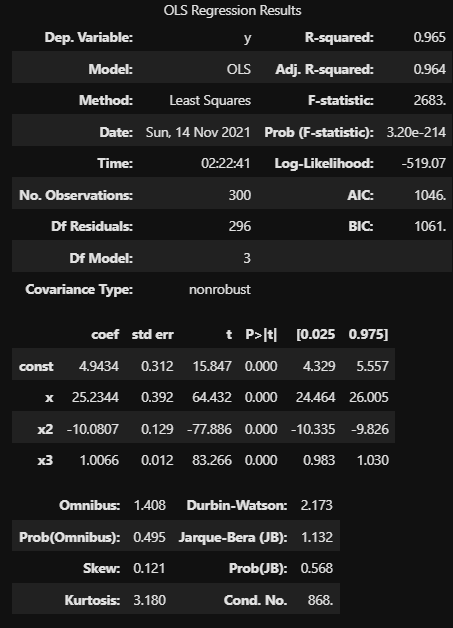

# Estadísticas sobre modelo ajustado

__$R^2$ ajustada__: 96.4% de la varianza de la variable dependiente es explicada por la regresión, lo cual indica un valor impensablemente bien para un modelo aún cuando no se requirió un tratamiento de puntos de apalancamiento.   

__Prob (F-statistic) ANOVA__: P-Value para la prueba T mucho menor al umbral común de .05. Existe total evidencia estadística para descartar que los datos provienen de una muestra totalmente aleatoria. Es decir, se rechaza la hipótesis nula, permitiendonos tener certeza de que tiene sentido ajustar un modelo de regresión a los datos.

__T-test__: Todos los parámetros son significativos estadísticamente hablando. Observar que las desviaciones estandares de los parámtros son tan bajas que el los intervalos de confianza que contienen al parámetro son pequeños y ninguno contiene a 0.

__Durbin-Watson__: Estadístico de 2.23, no existen autocorrelación en los datos. 

__Prob(JB)__: Normalidad en los residuales con un P-Value de .5. Indica evidencia estadística para aceptar la hipótesis nula.

# Métricas de ajuste

__Log-Likelihood__: Mejoró en comparación con el modelo lineal sin transformación. (Aumentó)

__AIC__: Mejoró en comparación con el modelo lineal sin transformación. (Disminuyó)

__BIC__: Mejoró en comparación con el modelo lineal sin transformación. (Disminuyó)



<h1><center> Dataset 2 </center></h1>

Desde antes de comenzar el análisis, puedo apreciar que esta forma es muy típica de un ajuste exponencial.

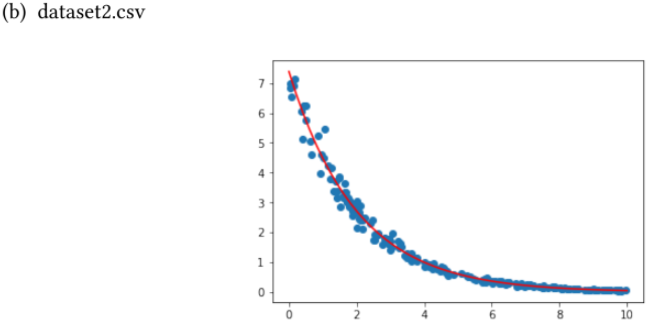

### Importar información

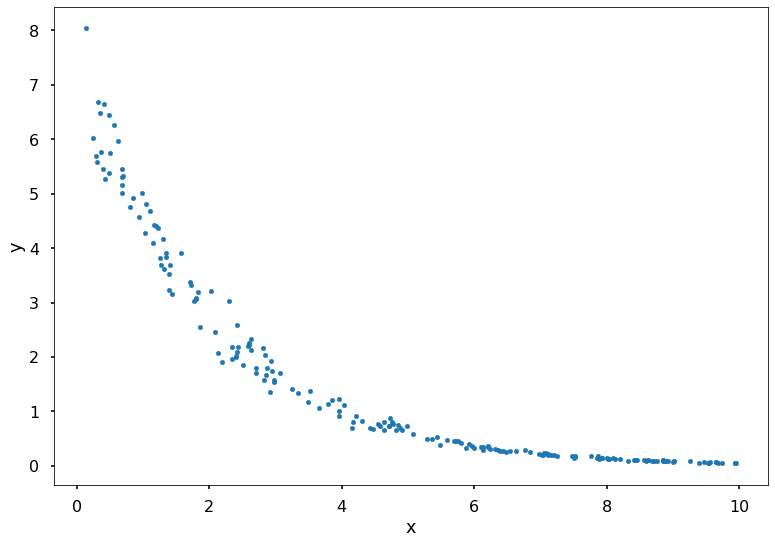

In [3]:
df2 = pd.read_csv("dataset2.csv")
df2.plot.scatter(x = "x", y = "y")

### Análisis de regresión

Como primer paso, ajustaré un modelo lineal clásico, haciendo caso omiso de mi instito por identificar un modelo exponencial. 

In [4]:
df2

,x,y
0,7.202538,0.201526
1,3.788621,1.134963
2,2.698942,1.699393
3,6.127142,0.353613
4,2.420332,2.090410
...,...,...
195,2.980299,1.582206
196,6.242707,0.310706
197,7.761878,0.174179
198,8.559783,0.109222


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     618.9
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           7.51e-63
Time:                        01:19:23   Log-Likelihood:                -273.06
No. Observations:                 200   AIC:                             550.1
Df Residuals:                     198   BIC:                             556.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3465      0.126     34.489      0.000       4.098       4.595
x             -0.5624      0.023    -24.878      0.000      -0.607      -0.518
==============================================================================
Omnibus:                       19.477   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.150
Skew:                           0.791   Prob(JB):                     1.55e-05
Kurtosis:                       3.390   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

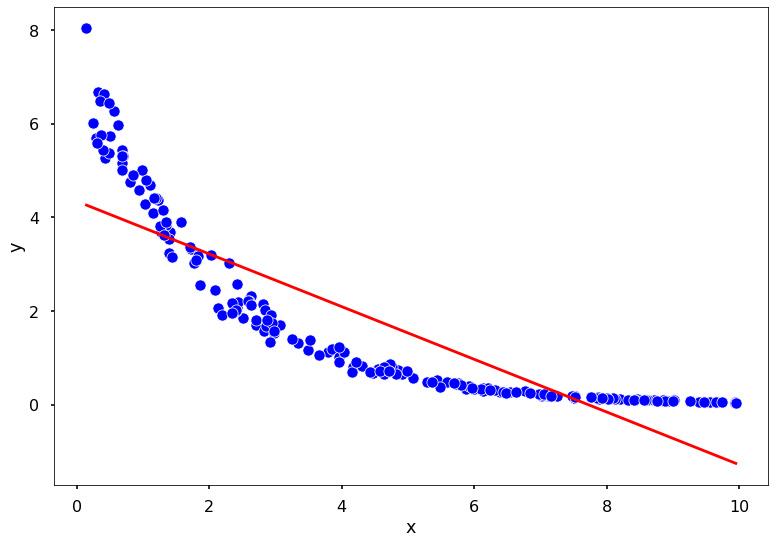

In [5]:
Yreg = df2["y"]
Xreg = sm.add_constant(df2["x"])
model = sm.OLS(Yreg,Xreg).fit()
display(model.summary())

beta = list(model.params)
X = np.linspace(min(df2['x']),max(df2['x']))
Y = beta[0]+beta[1]*X

sns.scatterplot(data=df2, x="x", y="y",color='Blue')
plt.plot(X, Y, c='red')

---

Propondré ajustar el siguiente modelo:

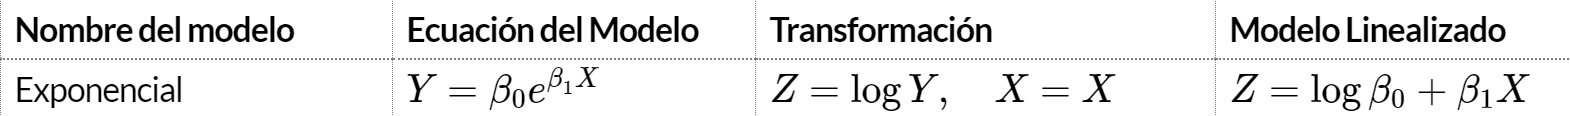

In [6]:
df2

,x,y
0,7.202538,0.201526
1,3.788621,1.134963
2,2.698942,1.699393
3,6.127142,0.353613
4,2.420332,2.090410
...,...,...
195,2.980299,1.582206
196,6.242707,0.310706
197,7.761878,0.174179
198,8.559783,0.109222


In [7]:
df2["ln(y)"] = np.log(df2["y"])
df2.head(3)

,x,y,ln(y)
0,7.202538,0.201526,-1.601837
1,3.788621,1.134963,0.126600
2,2.698942,1.699393,0.530271


Procederé a volver a ajustar un modelo pero ahora incluyendo las nuevas variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ln(y)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.472e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          3.44e-235
Time:                        01:34:36   Log-Likelihood:                 178.40
No. Observations:                 200   AIC:                            -352.8
Df Residuals:                     198   BIC:                            -346.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0027      0.013    151.880      0.000       1.977       2.029
x             -0.5002      0.002   -211.465      0.000      -0.505      -0.496
==============================================================================
Omnibus:                        1.147   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.248
Skew:                          -0.145   Prob(JB):                        0.536
Kurtosis:                       2.744   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

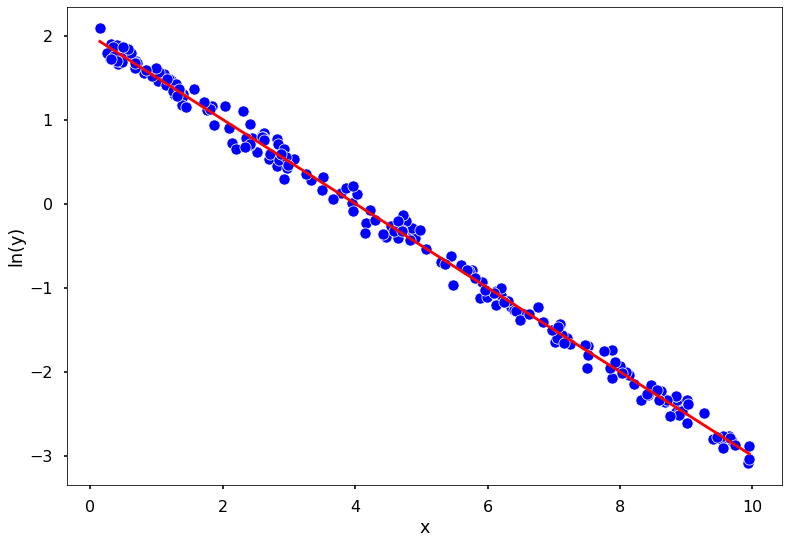

In [9]:
Yreg = df2["ln(y)"]
Xreg = sm.add_constant(df2["x"])
model = sm.OLS(Yreg,Xreg).fit()
display(model.summary())

beta = list(model.params)
X = np.linspace(min(df2['x']),max(df2['x']))
Y = beta[0]+beta[1]*X

sns.scatterplot(data=df2, x="x", y="ln(y)",color='Blue')
plt.plot(X, Y, c='red')

Para mejorar el modelo, es necesario quitar los puntos que apalanquen el modelo. Por lo visto estos no son muchos. 

Utilizaré el criterio de __Leverage__ visto en clase para punto de corte.

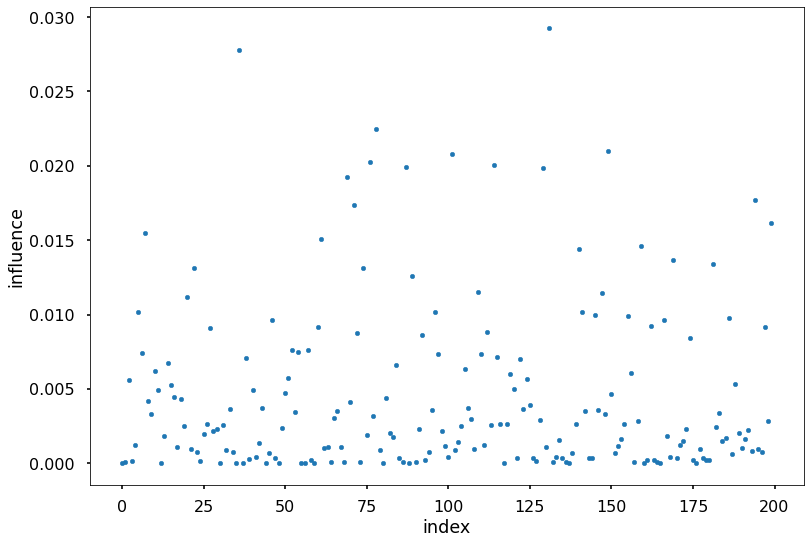

In [33]:
influence = model.get_influence()
c,p = influence.cooks_distance
influence_df = Xreg
influence_df['influence'] = c
influence_df["influence"].reset_index().plot(kind = "scatter", x = "index", y = "influence")

In [51]:
parametros = 2
observaciones = 200
influence_df = influence_df[influence_df['influence']<=parametros/observaciones * 2]
Xreg_noinf = sm.add_constant(df2.loc[influence_df.index,"x"])
Yreg_noinf = df2.loc[influence_df.index,"ln(y)"]




In [52]:
lrmodel_a = sm.OLS(Yreg_noinf,Xreg_noinf,prepend=True).fit()
display(lrmodel_a.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ln(y)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.918e+04
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          2.37e-232
Time:                        02:28:14   Log-Likelihood:                 185.74
No. Observations:                 193   AIC:                            -367.5
Df Residuals:                     191   BIC:                            -360.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0022      0.013    159.484      0.000       1.977       2.027
x             -0.4998      0.002   -221.765      0.000      -0.504      -0.495
==============================================================================
Omnibus:                        1.688   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.534
Skew:                          -0.100   Prob(JB):                        0.464
Kurtosis:                       2.612   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
Xreg_noinf

,const,x
0,1.0,7.202538
1,1.0,3.788621
2,1.0,2.698942
3,1.0,6.127142
4,1.0,2.420332
...,...,...
195,1.0,2.980299
196,1.0,6.242707
197,1.0,7.761878
198,1.0,8.559783


In [57]:
Yreg_noinf

0     -1.601837
1      0.126600
2      0.530271
3     -1.039552
4      0.737360
         ...   
195    0.458820
196   -1.168908
197   -1.747669
198   -2.214374
199   -2.528003
Name: ln(y), Length: 193, dtype: float64

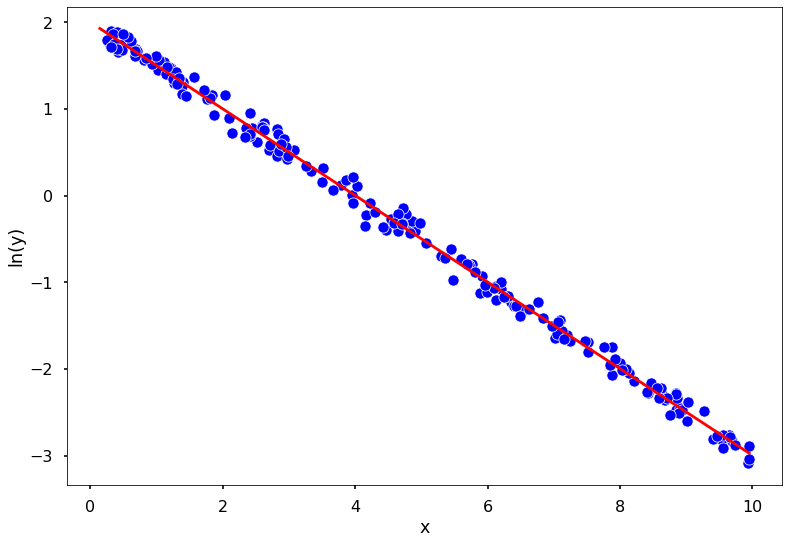

In [58]:
beta = list(lrmodel_a.params)
X = np.linspace(min(df2['x']),max(df2['x']))
Y = beta[0]+beta[1]*X

sns.scatterplot(x=Xreg_noinf.x, y=Yreg_noinf,color='Blue')
plt.plot(X, Y, c='red')

Regresando el modelo original

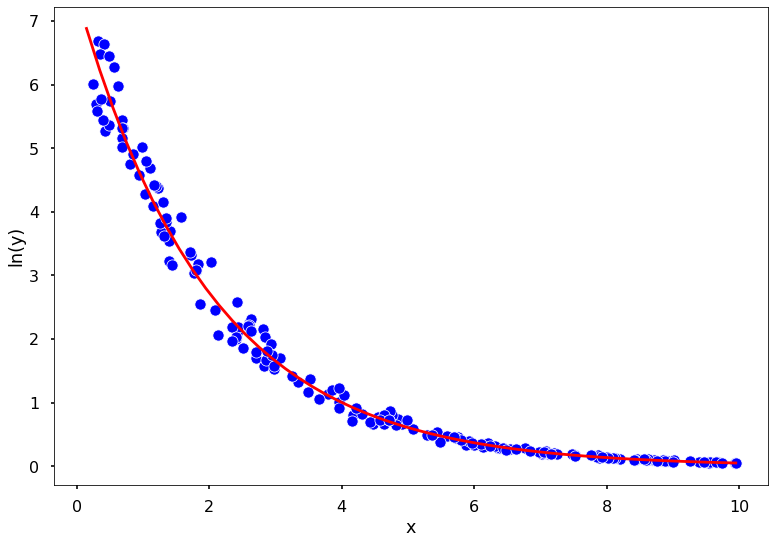

In [66]:
X = np.linspace(min(df2['x']),max(df2['x']))
Y = np.exp(beta[0])*np.exp(beta[1]*X)

sns.scatterplot(x=Xreg_noinf.x, y=np.exp(Yreg_noinf),color='Blue')
plt.plot(X, Y, c='red')

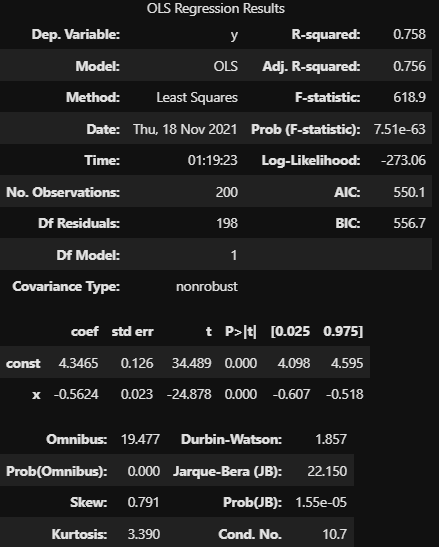
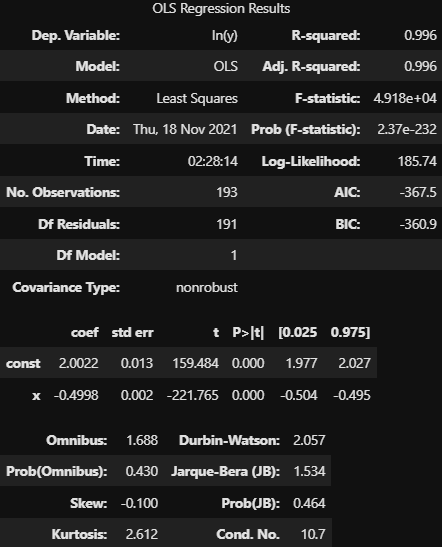

# Estadísticas sobre modelo ajustado

__$R^2$ ajustada__: 99.6% de la varianza de la variable dependiente es explicada por la regresión, lo cual indica un valor impensablemente bien para un modelo. Dado que se realizó un tratamiento de residuales, este valor se ve inflado por los recortes en puntos de apalancamiento.   

__Prob (F-statistic) ANOVA__: P-Value para la prueba T mucho menor al umbral común de .05. Existe total evidencia estadística para descartar que los datos provienen de una muestra totalmente aleatoria. Es decir, se rechaza la hipótesis nula, permitiendonos tener certeza de que tiene sentido ajustar un modelo de regresión a los datos.

__T-test__: Todos los parámetros son significativos estadísticamente hablando. Observar que las desviaciones estandares de los parámetros son tan bajas que los intervalos de confianza que contienen al parámetro son pequeños y ninguno contiene a 0.

__Durbin-Watson__: Estadístico de 2.057, no existen autocorrelación en los datos. 

__Prob(JB)__: Normalidad en los residuales con un P-Value de .464. Indica evidencia estadística para aceptar la hipótesis nula.

# Métricas de ajuste

__Log-Likelihood__: Mejoró en comparación con el modelo lineal sin transformación. (Aumentó)

__AIC__: Mejoró en comparación con el modelo lineal sin transformación. (Disminuyó)

__BIC__: Mejoró en comparación con el modelo lineal sin transformación. (Disminuyó)
